In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('data.csv')
print(df.head())
print(df.isnull().sum())
print(df.describe())
print(df.info)

   Unnamed: 0    income  happiness
0           1  3.862647   2.314489
1           2  4.979381   3.433490
2           3  4.923957   4.599373
3           4  3.214372   2.791114
4           5  7.196409   5.596398
Unnamed: 0    0
income        0
happiness     0
dtype: int64
       Unnamed: 0      income   happiness
count  498.000000  498.000000  498.000000
mean   249.500000    4.466902    3.392859
std    143.904482    1.737527    1.432813
min      1.000000    1.506275    0.266044
25%    125.250000    3.006256    2.265864
50%    249.500000    4.423710    3.472536
75%    373.750000    5.991913    4.502621
max    498.000000    7.481521    6.863388
<bound method DataFrame.info of      Unnamed: 0    income  happiness
0             1  3.862647   2.314489
1             2  4.979381   3.433490
2             3  4.923957   4.599373
3             4  3.214372   2.791114
4             5  7.196409   5.596398
..          ...       ...        ...
493         494  5.249209   4.568705
494         495  3.4717

This simple dataset just provides us with two columns, the happiness level varying from 0-10 and also the income which represents the money every participant makes.

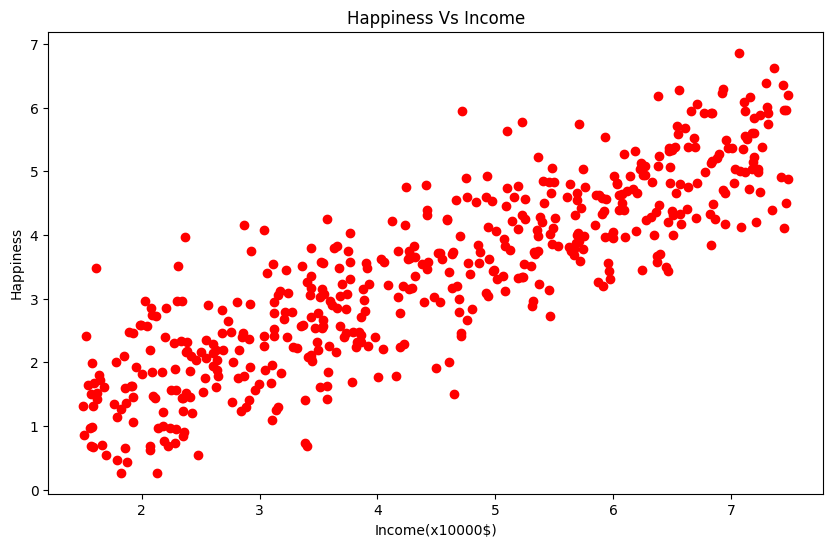

In [ ]:
plt.figure(figsize = (10,6))
plt.scatter(df['income'], df['happiness'], color = 'red')
plt.xlabel('Income(x10000$)')
plt.ylabel('Happiness')
plt.title('Happiness Vs Income')
plt.show()

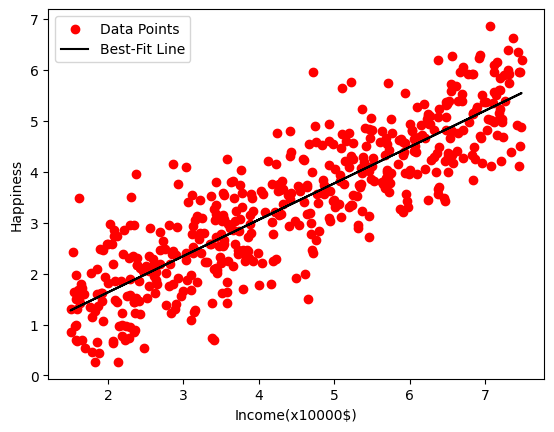

Slope (Coefficient): 0.7138255122802077
Intercept: 0.20427039620417586


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data
X = df['income'].values.reshape(-1,1)
Y = df['happiness']
# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, Y)

# Predict the values of Y using the model
Y_pred = model.predict(X)

# Plot the original data points
plt.scatter(X, Y, label='Data Points', color = 'red')

# Plot the best-fit line
plt.plot(X, Y_pred, color='black', label='Best-Fit Line')

# Add labels and a legend
plt.xlabel('Income(x10000$)')
plt.ylabel('Happiness')
plt.legend()

# Show the plot
plt.show()

# Print the slope (coefficient) and intercept of the best-fit line
print(f"Slope (Coefficient): {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")


Now we will talk about how the model really works and also the prerequisites that the data must have in order simple linear regression to be the best model for the given datapoints. In many real life problems we have some variables(in our case 2) and we want to extract the relationship between them and we want to lnow the value od the dependent one given the value of the independent. For example you can think about knowing the temperature and wanting to predict the humidity percentage of the day you analyze.In order to successfully implement it we should assume the homoscedasticity of the data, which claims that the error doesnt highly fluctuate between different datapoints. Another factor that should be examined is the independce of the points which practically declares that the observation of one sample doesn't affect another one and as a result we claim that they follow normal distribution. Lastly, as shown by the name of the algorithm, we assume a linear relationship between the variables we examine.
Above you can see two plots in which we can see that the first is near to linear and the other not

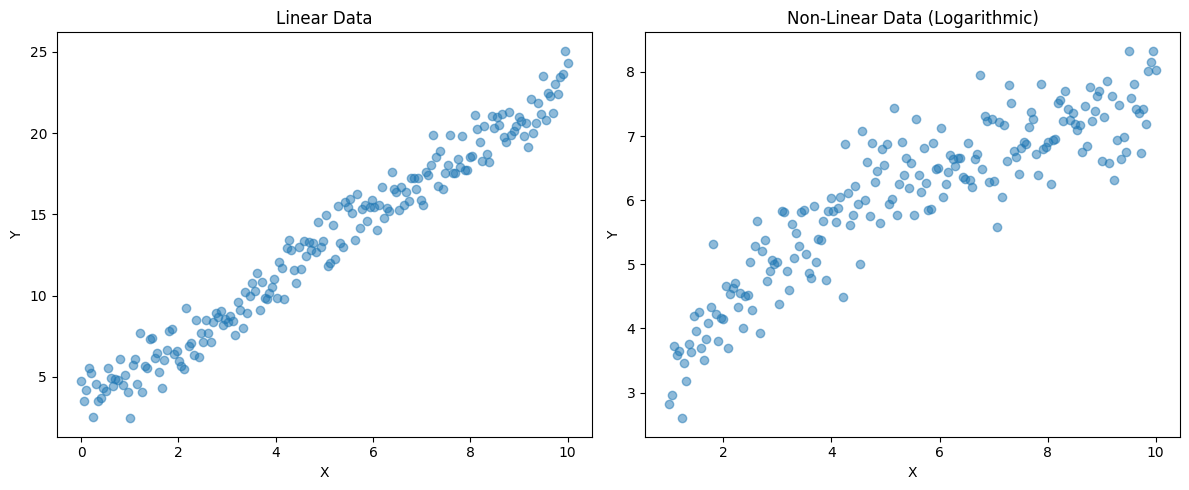

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(0)

# Generate linear data
X_linear = np.linspace(0, 10, 200)  # Generate 200 evenly spaced points from 0 to 10
Y_linear = 2 * X_linear + 3 + np.random.normal(0, 1, 200)  # Linear relationship with some noise

# Generate non-linear data (logarithmic relationship)
X_log = np.linspace(1, 10, 200)  # Generate 200 evenly spaced points from 1 to 10
Y_log = 2 * np.log(X_log) + 3 + np.random.normal(0, 0.5, 200)  # Logarithmic relationship with noise

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot linear data
axes[0].scatter(X_linear, Y_linear, label='Linear Data', alpha=0.5)
axes[0].set_title('Linear Data')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')

# Plot non-linear data (logarithmic)
axes[1].scatter(X_log, Y_log, label='Non-Linear Data', alpha=0.5)
axes[1].set_title('Non-Linear Data (Logarithmic)')
axes[1].set_xlabel('X')
axes[1].set_ylabel('Y')

# Display the plots
plt.tight_layout()
plt.show()


From the above diagramms we can easily see that the last one tends to be a linear-like dataset but we can see that at the end it approaches the logarithmic relationship. This is pretty normal(referring to the similar behavior of loagarithmic and linear) since the following inequality lnx>=x+1 and for small quantities of x it tends to equality.
But how does the model really work? Well, from linear algerba we know that y = b0+b1X+e is the equation of the line.Moreover, y is the predicted value of the dependent variable (y) for any given value of the independent variable (x), b0 is the intercept, the predicted value of y when the x is 0, b1 is the regression coefficient – how much we expect y to change as x increases. x is the independent variable ( the variable we expect is influencing y) and e is the error of the estimate, or how much variation there is in our estimate of the regression coefficient. The sklearn model is designed in order to find the best line fit. Staring with random weights, the line learns the slope and the line coefficient by comparing and updating the weights until we minimize the error. The metrics we use for evaluating our model are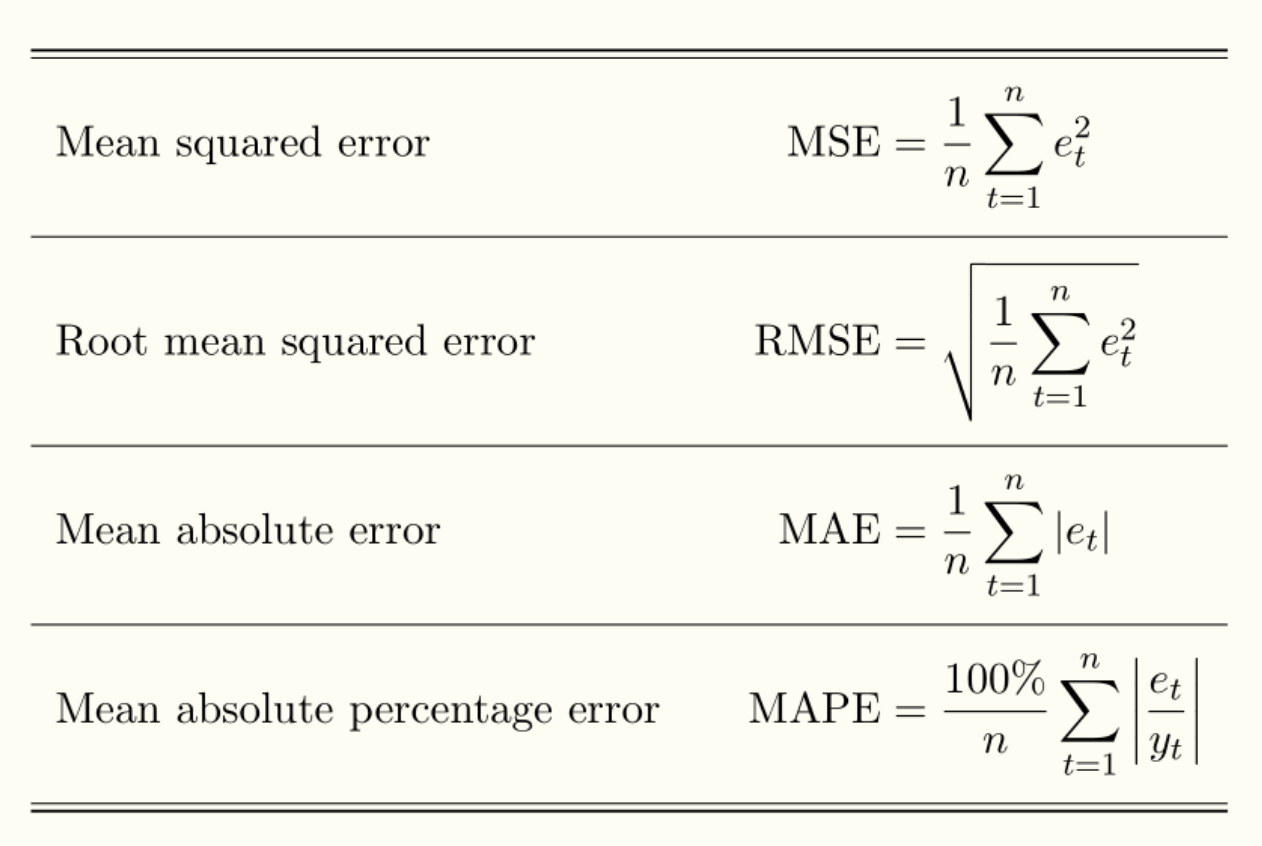